In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


white_path = "wine-white.csv"
red_path = "wine-red.csv"

red_wine = pd.read_csv(red_path)
white_wine = pd.read_csv(white_path)

white_wine['label'] = 'default'
red_wine['label'] = 'default'


In [17]:
def labelWine(threshhold, wine_type, data): # function labels the white as being good or bad based on the threshhold value provided
    for index, row in data.iterrows():
        number = -1
        if wine_type == "red":
            number = 0        
        elif wine_type == "white":
            number = 2   
        quality = row['quality']
        if quality<threshhold: 
            data.at[index,'label'] = number
        else:
            data.at[index,'label'] = number+1
            
    return data
#labeling the wine as being good or bad for both white and red whites
red_wine = labelWine(6, "red", red_wine)  
white_wine = labelWine(6, "white",white_wine)     
#combining the red and white wine dataset after labeling 
wine = pd.concat([red_wine,white_wine], ignore_index=True) 

wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,3
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,3


# Preprocessing

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from IPython.display import Markdown
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize

temp = wine.drop('quality',1)
labels = temp['label']
feature = temp.drop('label',1)
feature_scaled = scale(feature) # scaling the features data

0       0
1       0
2       0
3       1
4       0
       ..
6492    3
6493    2
6494    3
6495    3
6496    3
Name: label, Length: 6497, dtype: object

## Applying PCA

In [4]:
from sklearn.decomposition import PCA


#normalize features first
feature_norm = normalize(feature)
variance={'explained variance':[]}

#number of components to use for PCA
comp_num = 2

pca = PCA(n_components=comp_num)
pca.fit(feature_norm)
feature_PCA = pca.transform(feature_norm)


# Clustering the dataset into 4 clusters  (KMeans, DBScan, and Agglomerative Clustering)
- We will use numerous clustering methods to see if we can use our features to segement our samples into four distinct groups, good white, good red, bad white, and bad red.
- Good and bad wine will be determined by its quality rating. Any wine with a rating below 6 is bad and 6 and above is good.
- The red and white labels are derived from the dataset that the wine comes from. 

In [5]:
temp = wine.drop('quality',1)
labels = temp['label']
feature = temp.drop('label',1)
# scaling the features data
feature_scaled = scale(feature) 


scores = {name: [] for name in ('auto', 'full', 'elkan')}
scores_scaled = {name: [] for name in ('auto', 'full', 'elkan')}
scores_PCA = {name: [] for name in ('auto', 'full', 'elkan')}

for algorithm in ('auto', 'full', 'elkan'): # test different seed values with different algorithms and check the ARI scores
    for seed in np.arange(0, 10):
        kmeans = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        kmeans_scaled = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        kmeans_PCA = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        
        
        kmeans.fit(feature)
        kmeans_scaled.fit(feature_scaled)
        kmeans_PCA.fit(feature_PCA)
        
        ARI_score = metrics.adjusted_rand_score(kmeans.labels_ ,labels)
        ARI_score_scaled = metrics.adjusted_rand_score(kmeans_scaled.labels_ ,labels)
        ARI_score_PCA = metrics.adjusted_rand_score(kmeans_PCA.labels_ ,labels)
        
        array = kmeans.labels_
        array_pca = kmeans_PCA.labels_
        
        scores[algorithm].append(ARI_score)
        scores_scaled[algorithm].append(ARI_score_scaled)
        scores_PCA[algorithm].append(ARI_score_PCA)
        
#         print(algorithm, seed, ARI_score)

        


median_auto = np.median(np.array(scores['auto'])) # scores from non scaled features
median_full = np.median(np.array(scores['full']))
median_elkan = np.median(np.array(scores['elkan']))     

median_auto_scaled = np.median(np.array(scores_scaled['auto'])) # scores from scaled features
median_full_scaled = np.median(np.array(scores_scaled['full']))
median_elkan_scaled = np.median(np.array(scores_scaled['elkan']))  

median_auto_PCA = np.median(np.array(scores_PCA['auto'])) # scores from PCA reduced features
median_full_PCA = np.median(np.array(scores_PCA['full']))
median_elkan_PCA = np.median(np.array(scores_PCA['elkan']))  


display(Markdown(\
f'|[]()|Median scores|\n{"|---"*2}|\n'
f'|**auto**|{median_auto:.4}|\n'
f'|**full**|{median_full:.4}|\n'
f'|**elkan**|{median_elkan:.4}|\n'))

display(Markdown(\
f'|[]()|Median scores scaled|\n{"|---"*2}|\n'
f'|**auto**|{median_auto_scaled:.4}|\n'
f'|**full**|{median_full_scaled:.4}|\n'
f'|**elkan**|{median_elkan_scaled:.4}|\n'))

display(Markdown(\
f'|[]()|Median scores PCA|\n{"|---"*2}|\n'
f'|**auto**|{median_auto_PCA:.4}|\n'
f'|**full**|{median_full_PCA:.4}|\n'
f'|**elkan**|{median_elkan_PCA:.4}|\n'))

|[]()|Median scores|
|---|---|
|**auto**|0.1791|
|**full**|0.1791|
|**elkan**|0.1791|


|[]()|Median scores scaled|
|---|---|
|**auto**|0.3223|
|**full**|0.3223|
|**elkan**|0.3223|


|[]()|Median scores PCA|
|---|---|
|**auto**|0.1906|
|**full**|0.1906|
|**elkan**|0.1906|


## Results (KMEANS)
- We first tried scaling the data along axis = 1 and that gave us the same result as the raw data, so we did not pass an axis argument. Scaling the data this way improved our results.
- In regards to the algorithm selected for the kmeans testing it appears to not have an impact on the result as shown by the tables above.
- The medians that we recieved after finding the ARI scores from 0-9 are 0.1792, this was unscaled.
- After scaling the features we achieved a better ARI score of 0.3223.
- Overall we found that KMEANS was not very effective at clustering the wines into 4 groups. We may be able to get a better result if we use another clustering method. Another possibility is that the features don't allow us to separate the data into 4 distinct groups. 


### Results (Kmeans) PCA
- PCA performed better than the base featureset, but worse than the scaled featureset
- They all performed fairly poorly. 

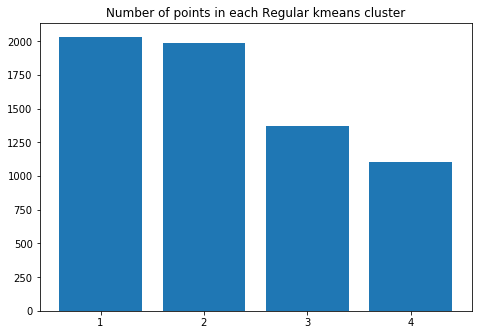

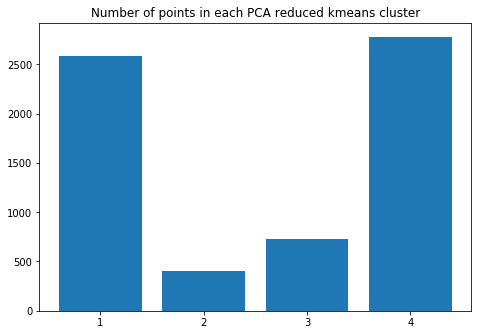

In [7]:
# plotting the number of points in each cluster
zero = np.count_nonzero(array==0)
one = np.count_nonzero(array==1)
two = np.count_nonzero(array==2)
three = np.count_nonzero(array==3)

clusters = ['1', '2', '3', '4']
count = [zero, one, two, three]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,count)

ax.set_title("Number of points in each Regular kmeans cluster")
plt.show()


#plotting number of points in each cluster For PCA reduced Data
zero = np.count_nonzero(array_pca==0)
one = np.count_nonzero(array_pca==1)
two = np.count_nonzero(array_pca==2)
three = np.count_nonzero(array_pca==3)

clusters = ['1', '2', '3', '4']
count = [zero, one, two, three]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,count)

ax.set_title("Number of points in each PCA reduced kmeans cluster")
plt.show()


# DBSCAN
- test different eps values with different min_samples values and plot the results
- find the combination that provides the highest score 
- use scaled data to improve results

max value is: 0.23513134334058194
eps:  10
min_samples:  200


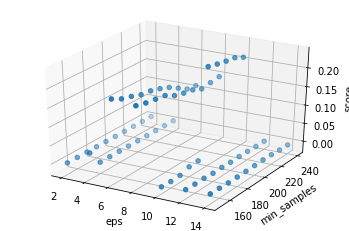

In [8]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

temp = wine.drop('quality',1)
labels = temp['label']
feature = temp.drop('label',1)
feature_scaled = scale(feature) # scaling the features data


# testing different min_sample values with different eps and recording the best ARI scores 
def db_results(features, eps_range):
    xs = []
    ys = []
    zs = []
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    max_value = 0 
    max_eps = -5
    samples_ = -5
# testting different min_sample values with different eps and recording the best ARI scores     
    for eps in eps_range:  
        for samples in range(150, 250, 10):
            
            xs.append(eps)
            ys.append(samples)
            # first use the non scaled features
            db = DBSCAN (eps = eps , min_samples = samples)
            db.fit(features)
            
            ARI_score = metrics.adjusted_rand_score(db.labels_,labels)
#             print(ARI_score)
            zs.append(ARI_score)
            if ARI_score > max_value:
                max_value = ARI_score
                max_eps = eps
                samples_ = samples
            
    print("max value is:", max_value)
    print("eps: ", max_eps)
    print("min_samples: ", samples_)

    ax.scatter(xs, ys, zs)
    ax.set_xlabel('eps')
    ax.set_ylabel('min_samples')
    ax.set_zlabel('score')
    # plotting a 3d graph to compare the ARI score based on 
    # different eps and min_sample values using scaled features data
    plt.show()    

db_results(feature, np.arange(2,16,2))

max value is: 0
eps:  -5
min_samples:  -5


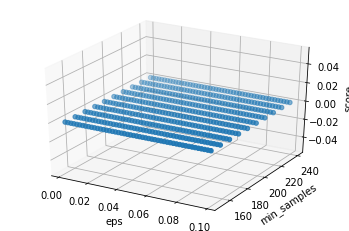

In [10]:
low_eps = np.arange(0.002,0.1,0.002)
db_results(feature_scaled, low_eps)

### Now re-run with different scalers

max value is: 0
eps:  -5
min_samples:  -5


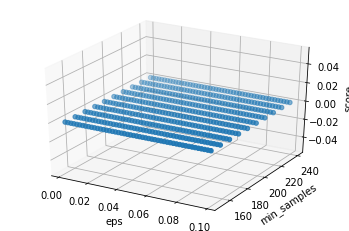

In [11]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler
# min max scaler
min_max_scaler = MinMaxScaler().fit(feature)
mm_feat = min_max_scaler.transform(feature)
db_results(mm_feat, low_eps)

max value is: 0.31249748262044025
eps:  0.056
min_samples:  240


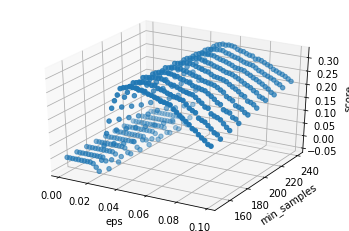

In [12]:
# normalizer scaler
norm_scaler = Normalizer().fit(feature)
norm_feat = norm_scaler.transform(feature)
db_results(norm_feat, low_eps)

max value is: 0
eps:  -5
min_samples:  -5


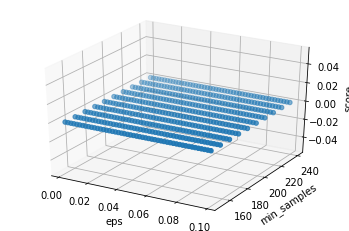

In [26]:
# robust scaler
rob_scaler = RobustScaler().fit(feature)
rob_feat = rob_scaler.transform(feature)
db_results(rob_feat, low_eps)

## Results (DBscan)
- We tried 4 types of scaling to help improve our results. Scaling the data did not help improve our results. The best results were obtained with the raw data set. 
- The data was tested using mutile eps and min_samples values, this allowed us to find optimal parameters to improve our clustering results.
- The highest ARI score we achieved was 0.235 with eps = 10 and min_samples = 200

### Now test the pca feature set

max value is: 0.32423995577726467
eps:  0.036000000000000004
min_samples:  160


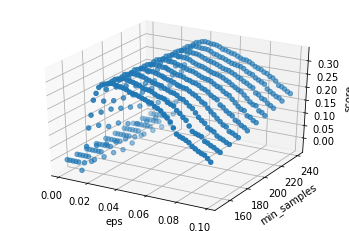

In [27]:
db_results(feature_PCA, low_eps)

## Results (DBscan) With PCA reduction
- the data was tested using mutile eps and min_samples values
- Since the PCA data is normalized, it needed to be tested using much smaller values of eps than the regular feature set.
- Highest ARI Score acheived was 0.324, with eps=0.036 and min_samples=160
- These results are notable, because a higher ARI score was acheived than for the base Data set (0.235 with eps = 10 and min_samples = 200)

# Agglomerative Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, RobustScaler

# split the labels and features
temp = wine.drop('quality',1)
labels = temp['label']
features = temp.drop('label',1)

names = ['ward euclidean', 'complete euclidean', 'average euclidean', 'single euclidean',
        'complete l1', 'average l1', 'single l1', 'complete l2', 'average l2', 'single l2']

def scale_fit(scaler, features, labels):
    
    sc_features = features.copy()
    scaler.fit(sc_features)
    # need to transform the features
    sc_features = scaler.transform(sc_features)
    scores = aggclust_initial(sc_features, labels, 4)
    return scores

def aggclust_initial(features, labels, n_clust):
    scores = {name: [] for name in ('ward', 'complete', 'average', 'single', 'ward euclidean',
                                    'complete euclidean', 'average euclidean', 'single euclidean',
                                    'complete l1', 'average l1', 'single l1',
                                    'complete l2', 'average l2', 'single l2')}
    for linkage_mode in ('ward', 'complete', 'average', 'single'):
        for affinity in ('euclidean', 'l1', 'l2'):
            if linkage_mode == 'ward' and affinity != 'euclidean':
                pass
            else:
                clust = AgglomerativeClustering(n_clusters = n_clust, affinity = affinity, 
                                                linkage = linkage_mode).fit(features)
                ARI_score = metrics.adjusted_rand_score(labels, clust.labels_)
                scores[linkage_mode + ' ' + affinity].append(ARI_score)
                scores[linkage_mode].append(ARI_score)
                
            
    return scores


# intitial results no scaling                
scores = aggclust_initial(features, labels, 4)

# scale the data
sc_features = scale(features, axis = 1)

# results with scaling
sc_scores = aggclust_initial(sc_features, labels, 4)
# with PCA reduced Data
PCA_scores = aggclust_initial(feature_PCA,labels,4)


In [24]:
# scale with different methods.
mm_scaler = MinMaxScaler()
n_scaler = Normalizer()
r_scaler = RobustScaler()


# transform the data and fit a model with that data

mm_scores = scale_fit(mm_scaler, features, labels)

n_scores = scale_fit(n_scaler, features, labels)

r_scores = scale_fit(r_scaler, features, labels)

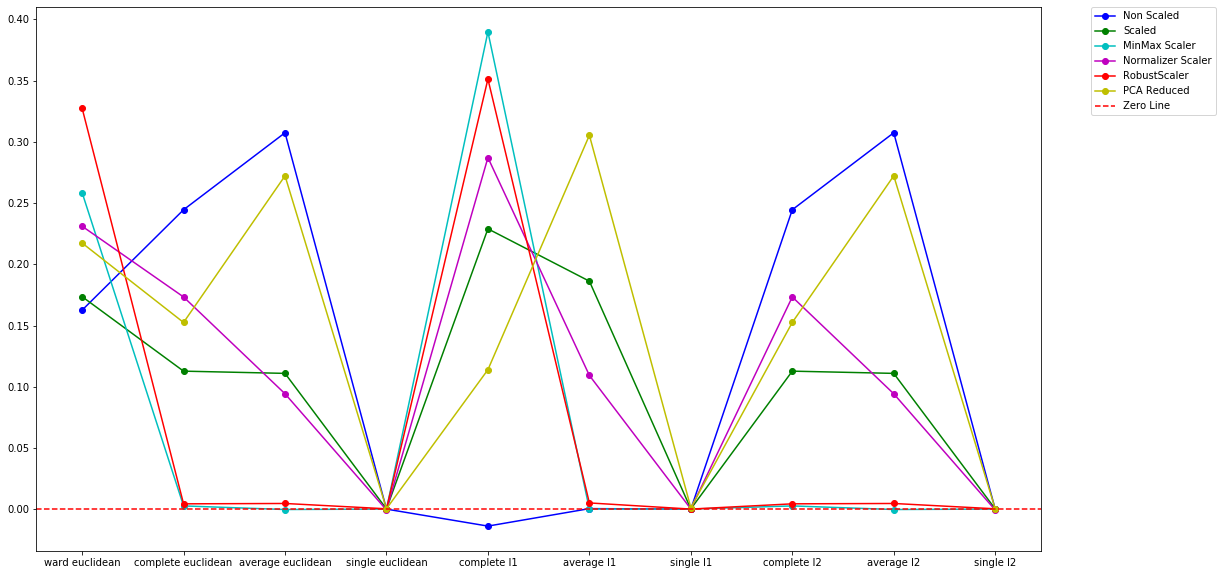

In [25]:
# setup data to display results

def setup_chart_data(score_lst, names):
    values = []
    for name in names:
        values.append(score_lst[name][0])
    return values
        
values = setup_chart_data(scores, names)
sc_values = setup_chart_data(sc_scores, names)
mm_values = setup_chart_data(mm_scores, names)
n_values = setup_chart_data(n_scores, names)
r_values = setup_chart_data(r_scores, names)
PCA_values = setup_chart_data(PCA_scores, names)

    
# plot the data  
f, ax = plt.subplots(1, 1, figsize = (18,10))
plt.plot(names, values, 'b', marker='o', label = 'Non Scaled')
plt.plot(names, sc_values, 'g', marker='o', label = 'Scaled')
plt.plot(names, mm_values, 'c', marker='o', label = 'MinMax Scaler')
plt.plot(names, n_values, 'm', marker='o', label = 'Normalizer Scaler')
plt.plot(names, r_values, 'r', marker='o', label = 'RobustScaler')
plt.plot(names, PCA_values, 'y', marker='o', label = 'PCA Reduced')


plt.axhline(0, c='r', linestyle='--', label= 'Zero Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

### Results
- When we visualize the results we see that the scaled data does not always perform better than the raw data. We also see that the scaled data typically works better when linkage = 'complete' and affinity = 'l1'. 
- Overall the non scaled data worked best with linkage = 'average' and affinity = 'euclidean'. 
- The best performing model used complete l1 with the data scaled with the min max scaler.

### Results with PCA
- When we visualize the results we see that the PCA reduced data, in general does not perform much better or worse than any other type of data.  
- Overall the PCA reduced data worked best with linkage = 'average' and affinity = 'l1'. 
- The PCA reduced data did not outperfomrm the previous best performing model, which used complete l1 with the data scaled with the min max scaler.

### Create a Dendogram
- This will help us see the clusters that exist within our models based on the type of data that we use 

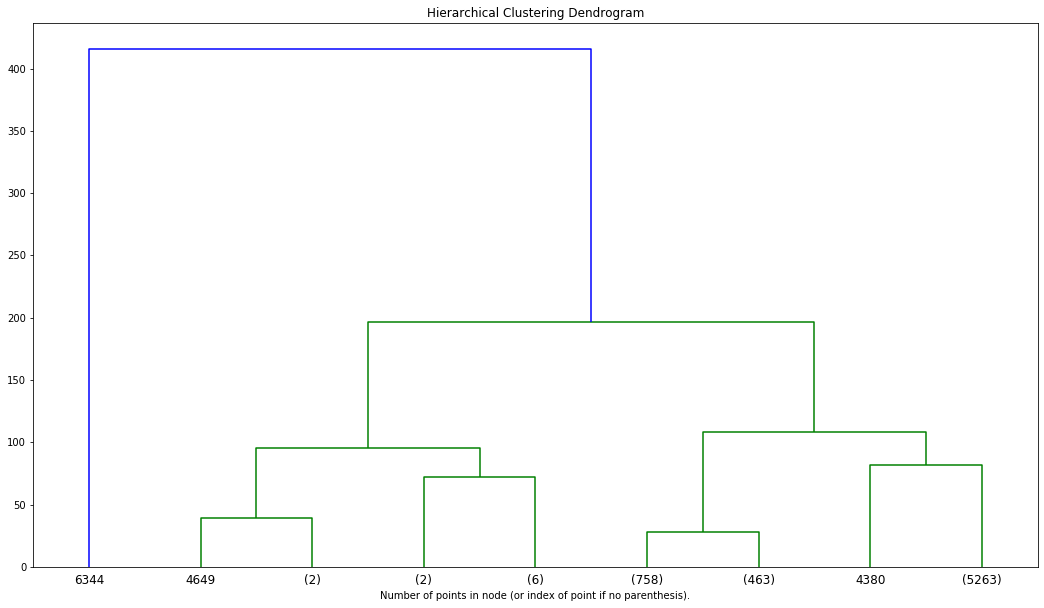

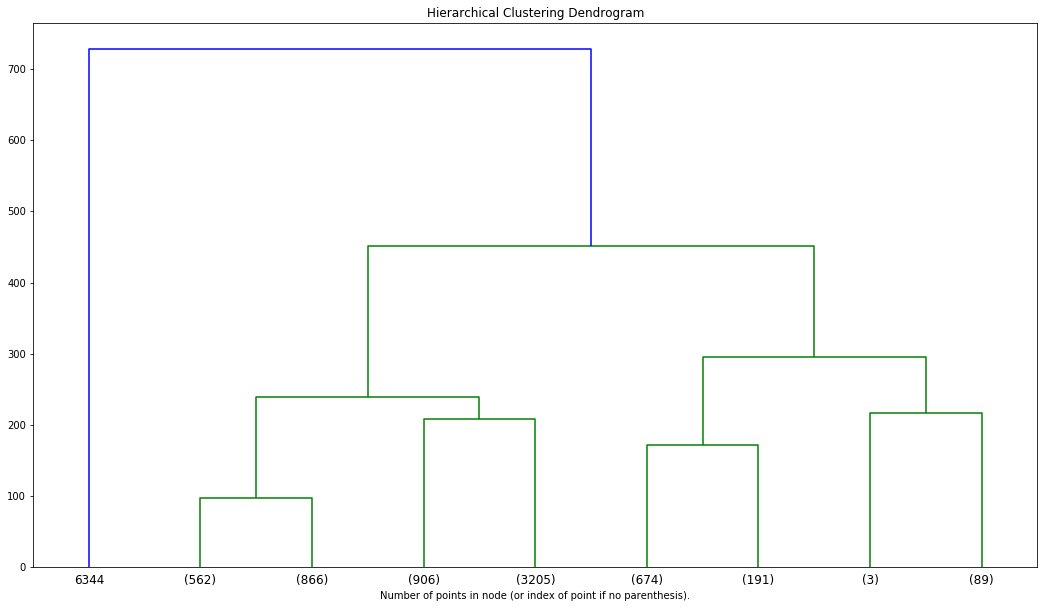

In [30]:
from scipy.cluster.hierarchy import dendrogram
# code taken from 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def setup_dendogram(features, model):
    model = model.fit(features)    
    f, ax = plt.subplots(1, 1, figsize = (18,10))
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    

    
# setting distance_threshold=0 ensures we compute the full tree.
# create a model to view dendogram with the raw data
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'average', affinity = 'euclidean')

# create a model to view dendogram with the scaled data
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'complete', affinity = 'l1')

# create a model to view pca dendogram
model3 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'average', affinity = 'l1')

# create dendograms to compare the models cluster distances
setup_dendogram(features, model)
setup_dendogram(features, model2)


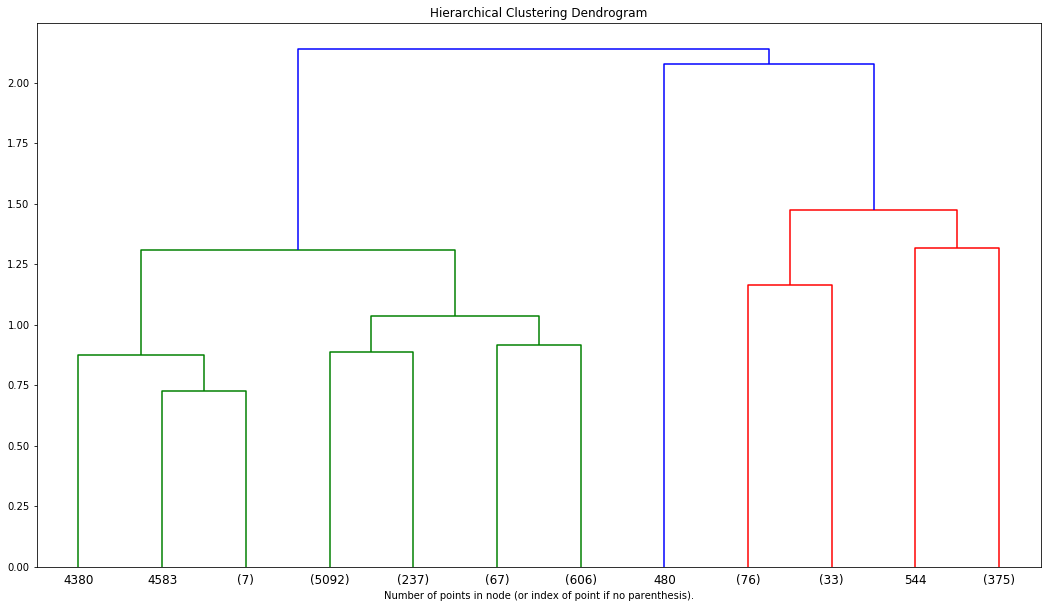

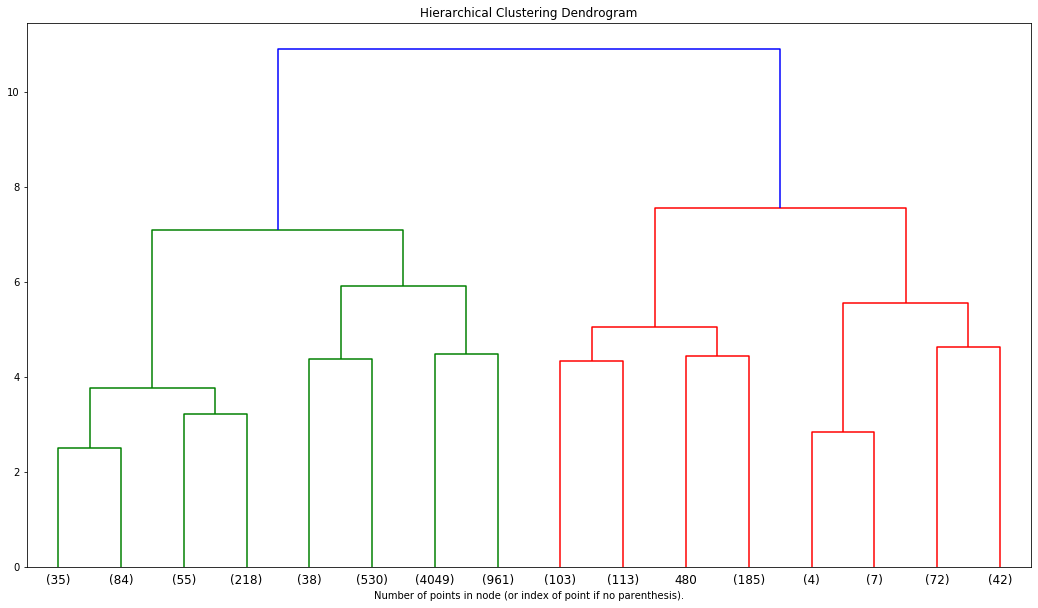

In [31]:
setup_dendogram(sc_features, model)
setup_dendogram(sc_features, model2)

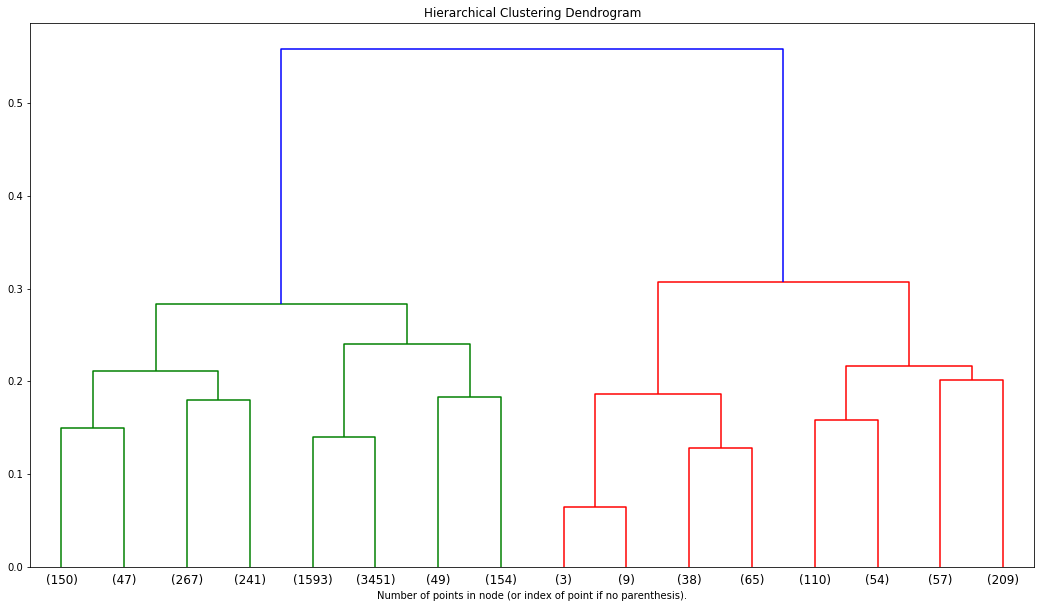

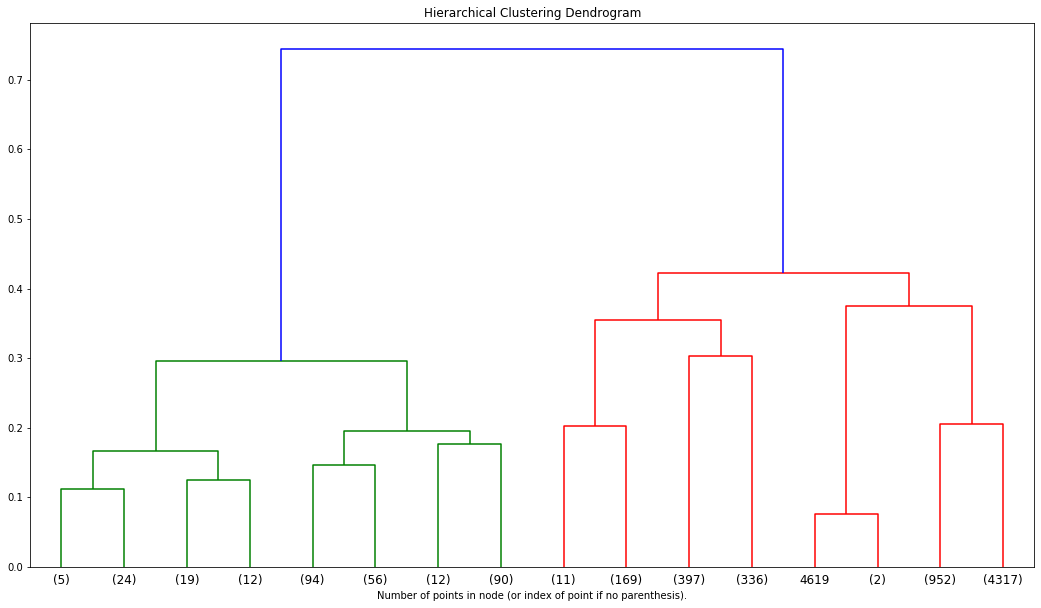

In [32]:
setup_dendogram(feature_PCA, model)
setup_dendogram(feature_PCA, model3)

### Scaled Data
- Again we see that the ideal model works better to create 4 distinct groups
- We also see that it there is a small disntance between the 4 distinct groups
- It is interesting that we don't see section with 4 distinct groups for the PCA data with it's ideal model

# Now we will compare the other scalers

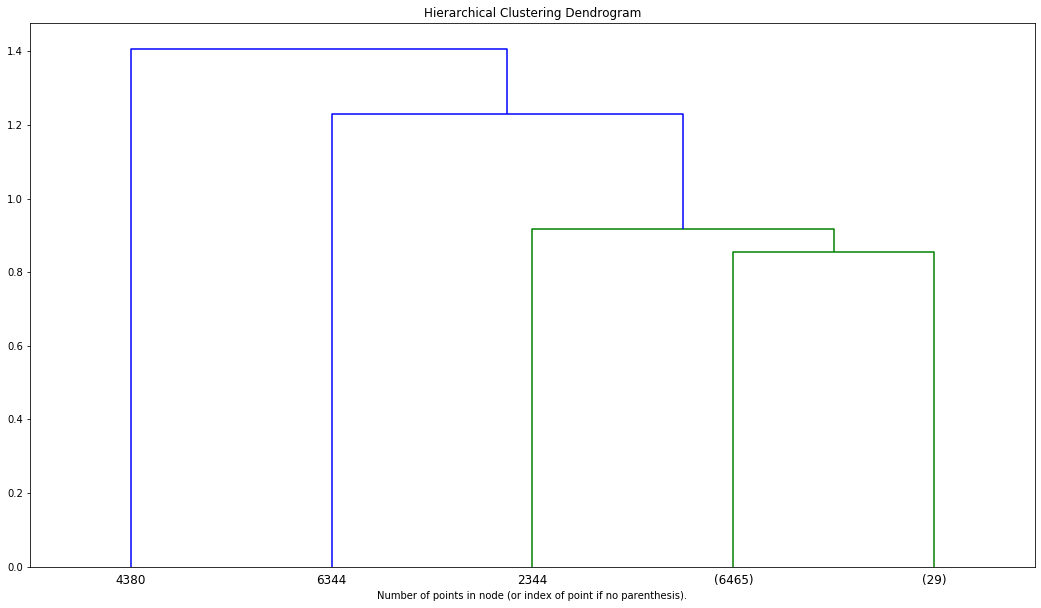

In [39]:
def setup_dendogram_scaled(scaler, features, model):
    
    scaler.fit(features)
    features = scaler.transform(features)
    model = model.fit(features)    
    f, ax = plt.subplots(1, 1, figsize = (18,10))
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
setup_dendogram_scaled(mm_scaler, features, model)

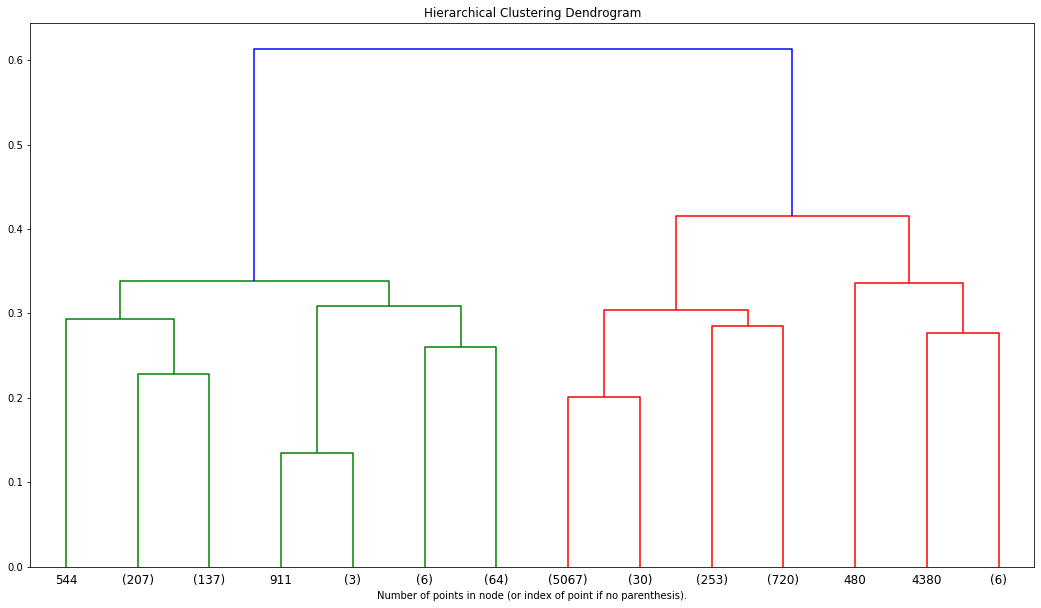

In [40]:
setup_dendogram_scaled(n_scaler, features, model)

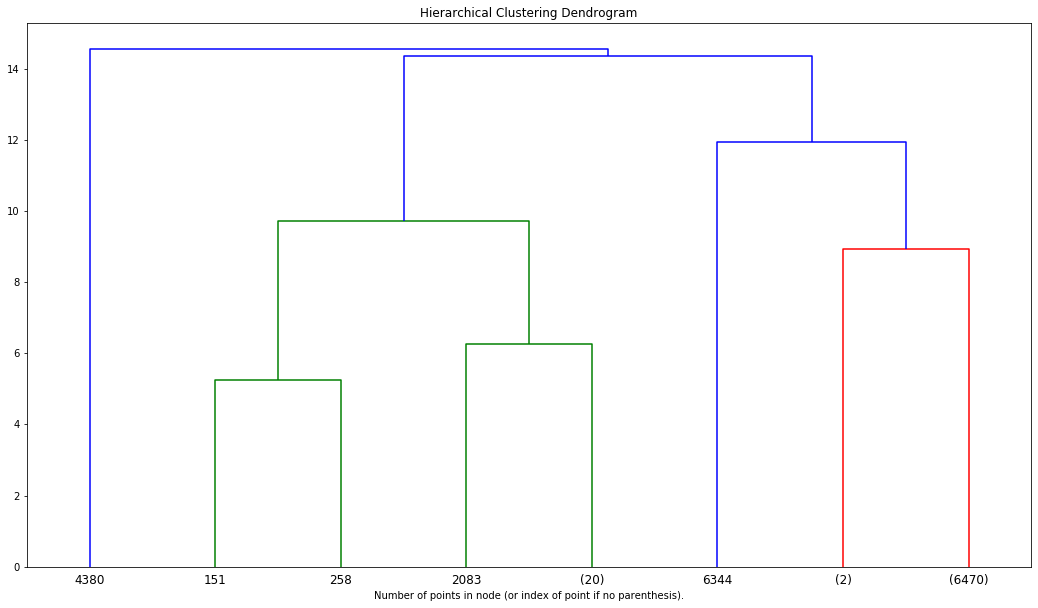

In [41]:
setup_dendogram_scaled(r_scaler, features, model)

### Results
- These dendograms show us the arrangement of the clusters. We can see that the greatest difference would occur if we tried to group the wines into two clusters. This makes sense as we did initially have two separate groups of wine, red and white. Our goal was to see if the wines can be separated into 4 clusters. Good Red, Bad Red, Good White and Bad White. The dendogram shows us that our features do not provide us with 4 well defined groups. A group of three or two would provide us with clusters with greater distance between the groups. 
- The minmax scaler clearly works the best to segment the data into clusters. It shows us that the wines can clearly be broken into 5 clusters with this scaler. 
- We could use this information to try to group our wines differently and see if that made a difference. This would require us to go back through the data and assign different labels
- Overall we found that Agglomerative testing did not work well to separate the wines into 4 groups.

### Final Results (PCA)
- For Kmeans Clustering, PCA did slightly outperforms the base featureset, however does not outperform the scaled featureset
- For DBScans Clustering, PCA actually performed the best out of all featuresets that were used
- For Agglomerative clustering, PCA did not perform significantly better or worse than other featuresets

# Final Results 
- For KMEANS clustering we got the best results when we used scaled values, we achieved an ARI score of 0.3223
- For DBscan clustering our best results was achieved using scaled data and having eps = 10 and min_samples = 200, we achieved a ARI score of 0.235
- For Agglomerative clustering our best performing model used complete l1 with the data scaled wit the min max scaler, the ARI score that we achieved was 0.38971
- We found it interesting that there was not a single scaler that improved the results accross the different
- It was also interesting to see how different the results were between clustering techniques and the number of parameters that could be tweaked to improve their accuracy.
- We found it quite hard to tune and use the eps parameter. Readings online didn't help us find a way to choose a better range.
- When it came to using dimension reduction with PCA we found that it did not improve the results for any of our data sets. As discussed before this tells us that none of our features have a strong corelation between them in our data set. 

Overall we would say that these feaures do not allow us to cluster the data into our 4 clusters, Good Red, Bad Red, Good White, and Bad white. Our analysis of the dendograms indicates that there are not 4 well defined clusters that emerge from these features. The dendograms indicated that there could be 3 or 5 distinct groups but we don't know what these are or how to label them. 